In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import r2_score

# Load in data

In [3]:
#This data is about New York city Airbnb dataset from Kaggle. 
#The main goal is to analyis and learing this data is to predict the Airbnb price in NY.
#The original data has 48895 row and 16 columns

In [4]:
df = pd.read_csv('dataset/AB_NYC_2019.csv')

In [5]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


# EDA -- data cleaning

In [6]:
#check variable types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [10]:
#check missing values

In [11]:
df.isnull().sum()/df.shape[0] * 100

#later we are going to drop the columns "last_review" and "review per month" as we've already got "number of reviews"

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [12]:
df1 = df

In [13]:
#handling outliers of the target 

(48895,)


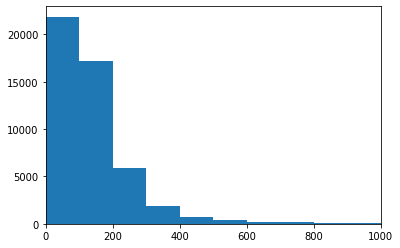

In [14]:
plt.hist(df1['price'], bins=100)
plt.xlim(0, 1000)
print(df1['price'].shape)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7a0f1f880>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7a0f1fee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7a0f1f5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7a0f30400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7a0f306d0>],
 'means': []}

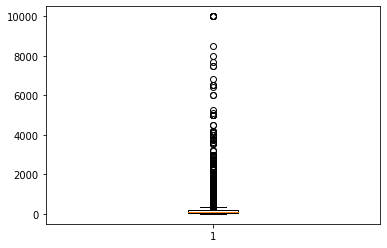

In [15]:
plt.boxplot(df1['price'])

In [16]:
#only keep data with price < 1000
df2 = df1[df1['price']<1000].reset_index(drop=True)
print(df2.shape)

(48597, 16)


In [17]:
print(df2['price'].min())
print(df2['price'].max())

0
999


In [18]:
#only keep data with price > 0
df2 = df2[df2['price']!=0].reset_index(drop=True)
print(df2.shape)

(48586, 16)


(array([24557., 16059.,  4958.,  1552.,   716.,   264.,   189.,   169.,
           67.,    55.]),
 array([ 10. , 108.9, 207.8, 306.7, 405.6, 504.5, 603.4, 702.3, 801.2,
        900.1, 999. ]),
 <BarContainer object of 10 artists>)

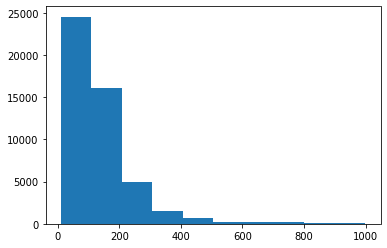

In [19]:
plt.hist(df2['price'])

# Data exploration

In [128]:
df2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [129]:
#drop some columnes and check the categorical and numerical columns separately

df3 = df2.drop(['id','name','host_id', 'host_name', 'last_review', 'reviews_per_month'], axis = 1)
df3_num = df3.select_dtypes(include=['int64', 'float64'])
df3_obj = df3.select_dtypes(include=['object'])

In [130]:
df3_obj

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48581,Brooklyn,Bedford-Stuyvesant,Private room
48582,Brooklyn,Bushwick,Private room
48583,Manhattan,Harlem,Entire home/apt
48584,Manhattan,Hell's Kitchen,Shared room


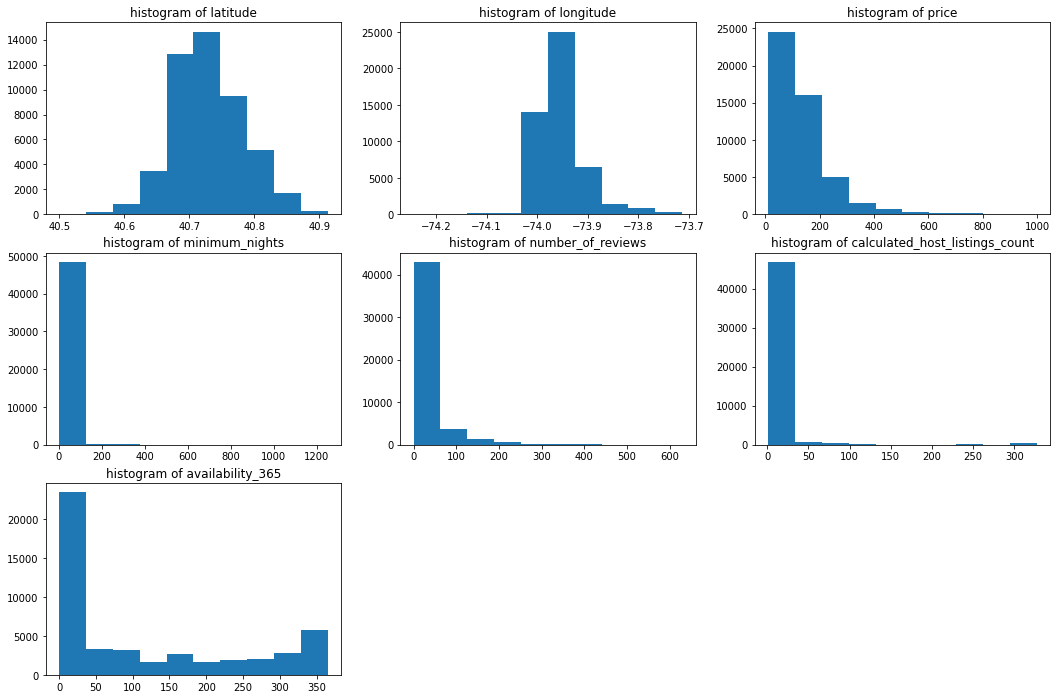

In [131]:
#plot the histogram of numeric columns

fig = plt.figure(figsize=(18, 12))
for i in range(len(df3_num.columns)):
    ax = fig.add_subplot(3, 3, i+1)
    plt.hist(df3_num[df3_num.columns[i]])
    plt.title('histogram of {}'.format(df3_num.columns[i]))

Text(0.5, 1.0, 'Count of room type')

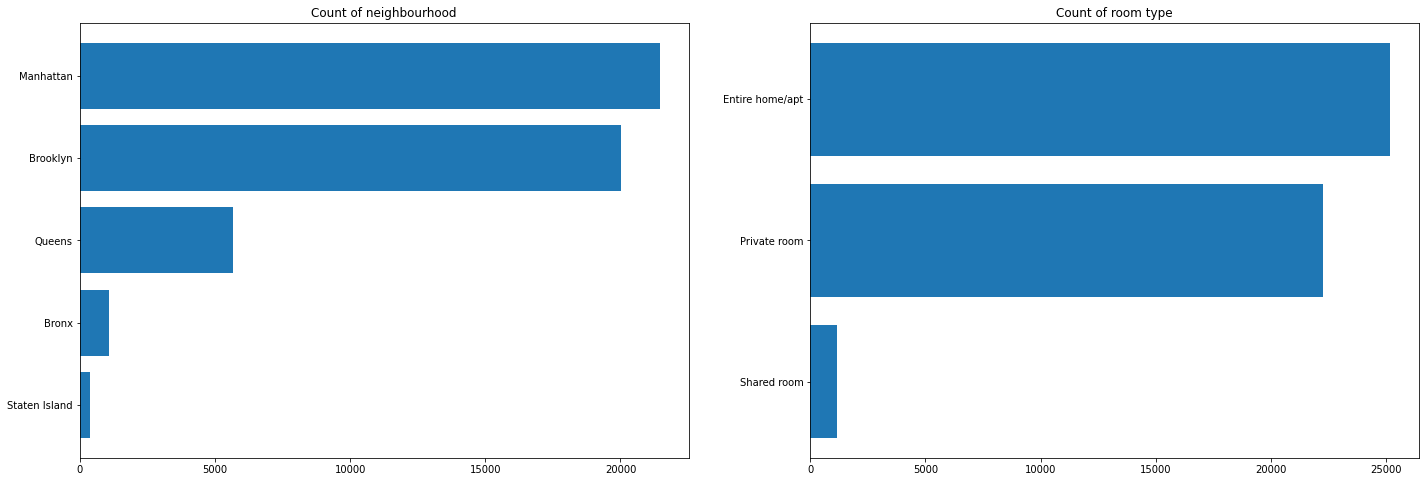

In [149]:
#using horizontal bar plot to plot the categrical variable

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 2, 1)
ax.barh(df3.groupby('neighbourhood_group')['neighbourhood_group'].count().sort_values(ascending=True).index,
        df3.groupby('neighbourhood_group')['neighbourhood_group'].count().sort_values(ascending=True))
plt.title('Count of neighbourhood')
ax = fig.add_subplot(1, 2, 2)
ax.barh(df3.groupby('room_type')['room_type'].count().sort_values(ascending=True).index,
        df3.groupby('room_type')['room_type'].count().sort_values(ascending=True))     
plt.title('Count of room type')

<BarContainer object of 50 artists>

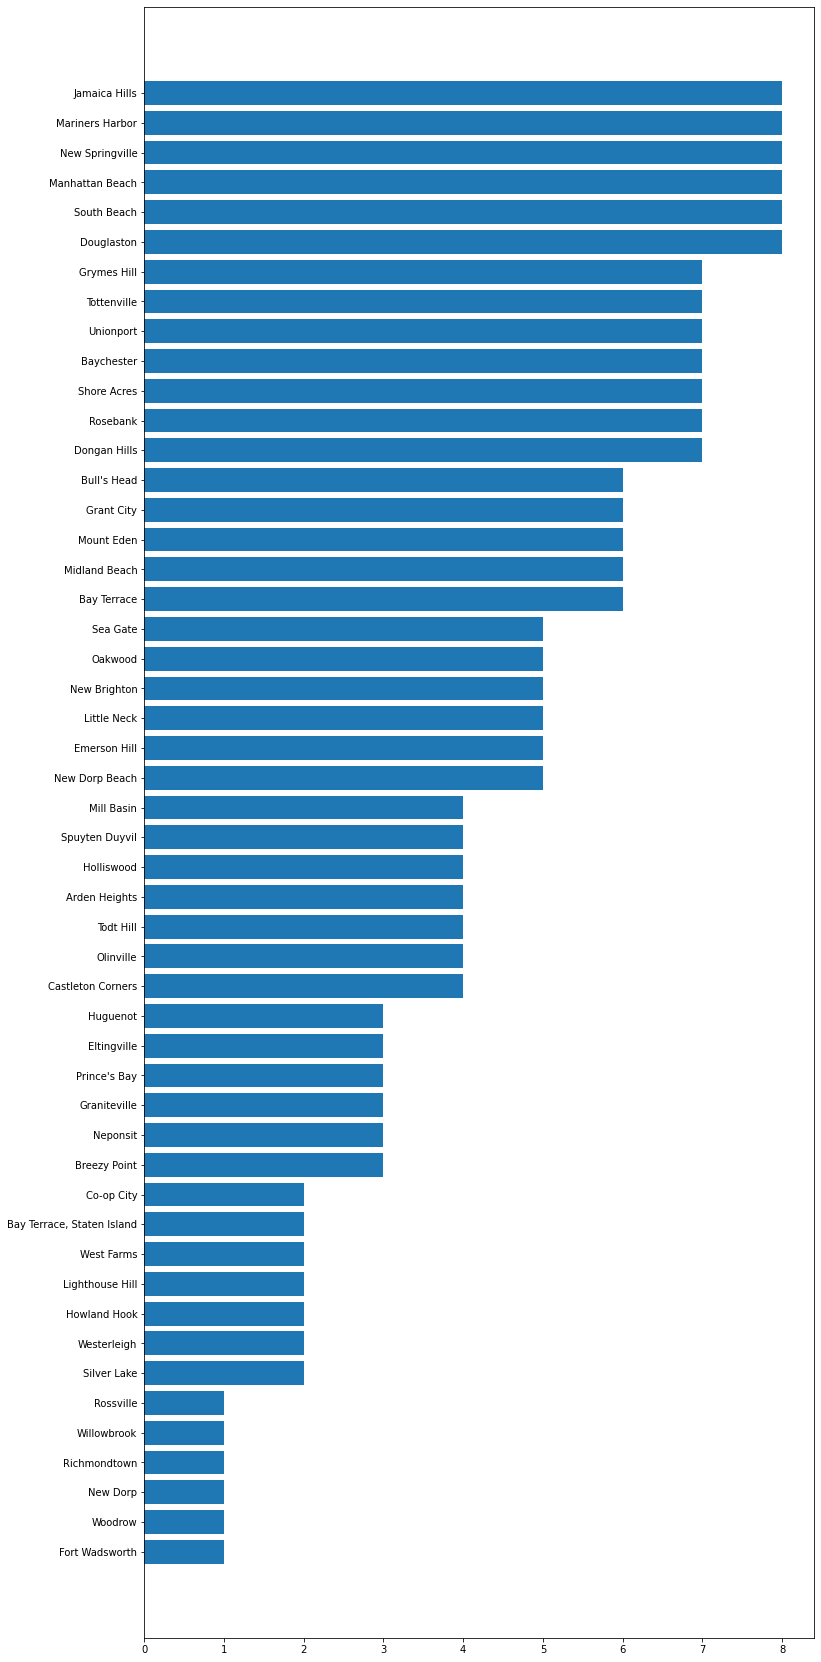

In [133]:
fig = plt.figure(figsize=(12, 30))
ax = fig.add_subplot(1, 1, 1)
ax.barh(df3.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending=True).index[0:50],
        df3.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending=True)[0:50])

C:\Users\zhang\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

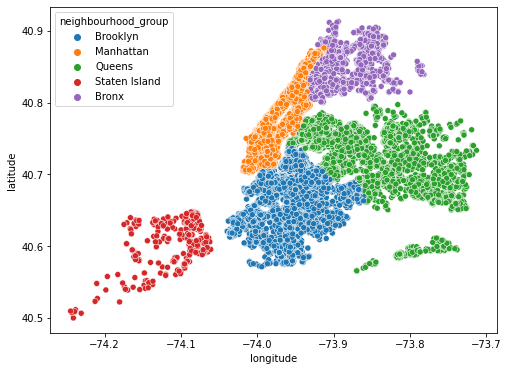

In [134]:
#plot the neighourhood group and got the NY map

plt.figure(figsize=(8,6))
sns.scatterplot(df3.longitude, df3.latitude, hue=df3.neighbourhood_group)

C:\Users\zhang\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

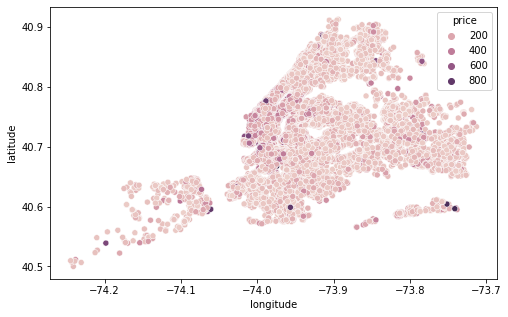

In [135]:
#plot the price over the NY map
plt.figure(figsize=(8,5))
sns.scatterplot(df3.longitude, df3.latitude, hue=df3.price)

C:\Users\zhang\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

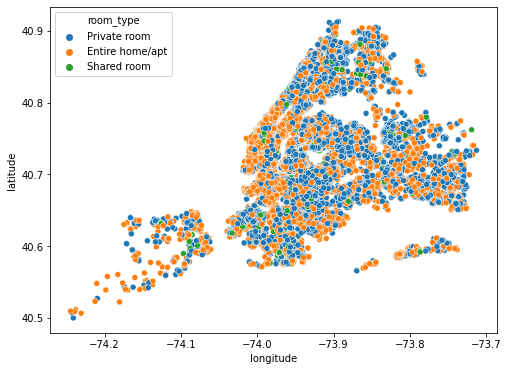

In [136]:
plt.figure(figsize=(8,6))
sns.scatterplot(df3.longitude, df3.latitude, hue=df3.room_type)

Text(0.5, 1.0, 'room type VS. price')

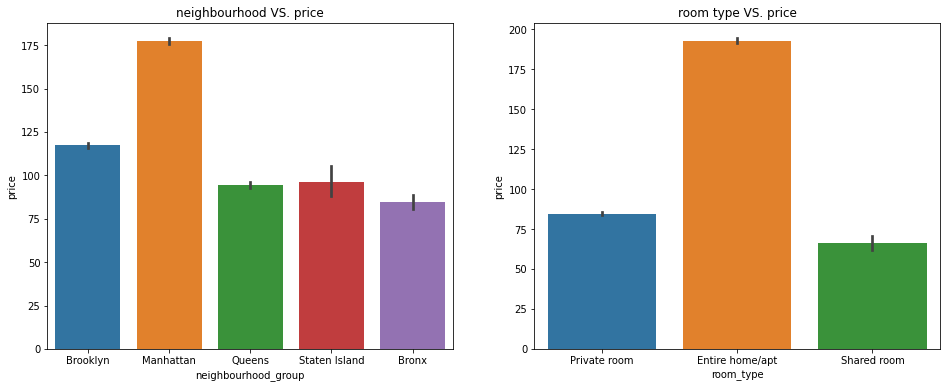

In [146]:
ax = plt.figure(figsize=(16,6))
ax.add_subplot(1, 2, 1)
sns.barplot(x=df3.neighbourhood_group, y=df3.price)
plt.title('neighbourhood VS. price')
ax.add_subplot(1, 2, 2)
sns.barplot(x=df3.room_type, y=df3.price)
plt.title('room type VS. price')

In [161]:
df3_bk=df3[df3.neighbourhood_group=='Brooklyn'].price
df3_si=df3[df3.neighbourhood_group=='Staten Island'].price
df3_qu=df3[df3.neighbourhood_group=='Queens'].price
df3_br=df3[df3.neighbourhood_group=='Bronx'].price

Text(0.5, 1.0, 'histogram of neighbourhood_group is Bronx')

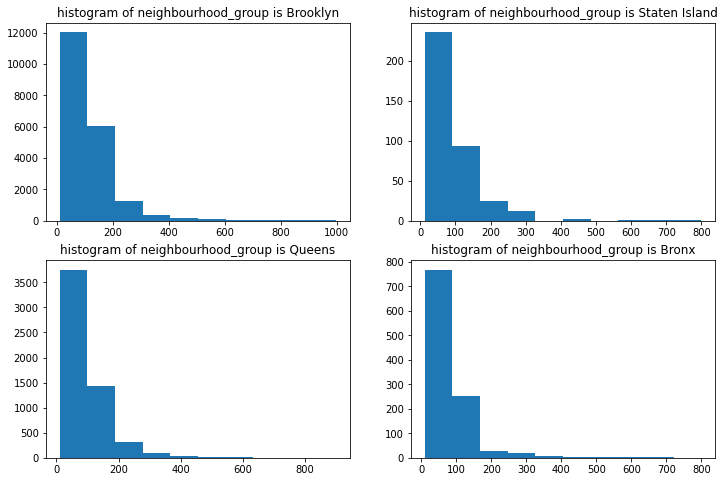

In [170]:
ax = plt.figure(figsize=(12, 8))
ax.add_subplot(2, 2, 1)
plt.hist(df3_bk)
plt.title('histogram of neighbourhood_group is Brooklyn')
ax.add_subplot(2, 2, 2)
plt.hist(df3_si)
plt.title('histogram of neighbourhood_group is Staten Island')
ax.add_subplot(2, 2, 3)
plt.hist(df3_qu)
plt.title('histogram of neighbourhood_group is Queens')
ax.add_subplot(2, 2, 4)
plt.hist(df3_br)
plt.title('histogram of neighbourhood_group is Bronx')

In [171]:
stats.kruskal(df3_bk, df3_si)

KruskalResult(statistic=41.77087874170272, pvalue=1.0262053479215368e-10)

In [173]:
stats.ttest_ind(df3_si, df3_qu)

Ttest_indResult(statistic=0.4171589733503411, pvalue=0.6765770043297705)

In [172]:
stats.kruskal(df3_si, df3_qu)

KruskalResult(statistic=0.3060039686786933, pvalue=0.5801427250191515)

In [174]:
stats.kruskal(df3_si, df3_br)

KruskalResult(statistic=9.19821000222844, pvalue=0.0024225189871414786)

In [29]:
#check the correlation between the target and features, and the correlation among different features
df3.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
latitude,1.000000,0.084671,0.063672,0.025215,-0.015315,0.019515,-0.011019
longitude,0.084671,1.000000,-0.264539,-0.064107,0.058173,-0.115533,0.084768
price,0.063672,-0.264539,1.000000,0.020715,-0.056773,0.136618,0.117650
minimum_nights,0.025215,-0.064107,0.020715,1.000000,-0.080127,0.129660,0.143985
number_of_reviews,-0.015315,0.058173,-0.056773,-0.080127,1.000000,-0.072720,0.173752
calculated_host_listings_count,0.019515,-0.115533,0.136618,0.129660,-0.072720,1.000000,0.227088
availability_365,-0.011019,0.084768,0.117650,0.143985,0.173752,0.227088,1.000000


<AxesSubplot:>

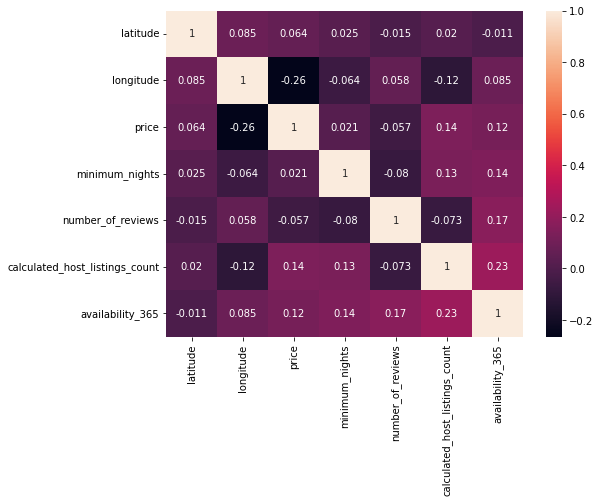

In [30]:
#It looks like the correlation between target and features are low (<0.26)
#The correlation among the features are also low
plt.figure(figsize=(8,6))
sns.heatmap(df3.corr(), annot=True)

In [31]:
#can use T test to check the correlation between different feature as well

# Feature engineering

In [78]:
X = df3.drop(['price'], axis=1)
y = df3['price']

In [79]:
X
y

0        149
1        225
2        150
3         89
4         80
        ... 
48581     70
48582     40
48583    115
48584     55
48585     90
Name: price, Length: 48586, dtype: int64

In [80]:
#split the training data and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [81]:
#get dummy variable for feature "neighborhood_group_num"
le1 = LabelEncoder()
X_train['neighborhood_group_num'] = le1.fit_transform(X_train.neighbourhood_group)
X_test['neighborhood_group_num'] = le1.transform(X_test.neighbourhood_group)

In [88]:
#get dummy variable for feature "room_type_num"
le2 = LabelEncoder()
X_train['room_type_num'] = le2.fit_transform(X_train.room_type)
X_test['room_type_num'] = le2.transform(X_test.room_type)

In [89]:
X_train['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [113]:
pd.DataFrame(le2.transform(['Entire home/apt', 'Private room', 'Shared room']), index=['Entire home/apt', 'Private room', 'Shared room'],
            columns=['dummy variable for room_type'])

,dummy variable for room_type
Entire home/apt,0
Private room,1
Shared room,2


In [114]:
le2.transform(['Entire home/apt', 'Private room', 'Shared room'])

array([0, 1, 2])

In [115]:
#le3 = LabelEncoder()
#X_train['neighborhood_num'] = le3.fit_transform(X_train.neighbourhood)
#X_test['neighborhood_num'] = le3.transform(X_test.neighbourhood)

In [116]:
X_train

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighborhood_group_num,room_type_num
24946,Brooklyn,Bushwick,40.69521,-73.90959,Private room,7,0,1,0,1,1
12028,Brooklyn,South Slope,40.66548,-73.98279,Entire home/apt,4,3,1,0,1,0
25949,Manhattan,Financial District,40.70849,-74.01486,Entire home/apt,30,0,33,329,2,0
20758,Manhattan,Harlem,40.82097,-73.95282,Private room,3,2,1,0,2,1
38474,Manhattan,Hell's Kitchen,40.76393,-73.98721,Entire home/apt,30,0,232,227,2,0
...,...,...,...,...,...,...,...,...,...,...,...
18117,Brooklyn,Williamsburg,40.71932,-73.95649,Entire home/apt,3,99,2,239,1,0
1760,Brooklyn,Bushwick,40.70308,-73.92765,Entire home/apt,4,12,1,0,1,0
16869,Manhattan,Theater District,40.75948,-73.98631,Private room,5,19,1,88,2,1
34873,Manhattan,Financial District,40.70788,-74.00459,Entire home/apt,29,0,96,267,2,0


In [117]:
#drop the "neighbourhood_group" and 'room_type' features as the dummy variable were created
#drop 'latitude', 'longitude', 'neighbourhood' features

X_train.drop(['neighbourhood_group','neighbourhood','latitude', 'longitude', 'room_type'], axis=1, inplace=True)
X_test.drop(['neighbourhood_group','neighbourhood','latitude', 'longitude', 'room_type'], axis=1, inplace=True)

In [118]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [119]:
#standardize the X dataset

scl = StandardScaler()
X_train1 = pd.DataFrame(scl.fit_transform(X_train), columns=X_train.columns)
X_test1 = pd.DataFrame(scl.transform(X_test), columns=X_test.columns)

In [120]:
X_train1

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighborhood_group_num,room_type_num
0,0.002467,-0.522109,-0.186071,-0.856392,-0.916403,0.906943
1,-0.148468,-0.455640,-0.186071,-0.856392,-0.916403,-0.927521
2,1.159635,-0.522109,0.782494,1.647550,0.439830,-0.927521
3,-0.198779,-0.477796,-0.186071,-0.856392,0.439830,0.906943
4,1.159635,-0.522109,6.805759,0.871252,0.439830,-0.927521
...,...,...,...,...,...,...
38863,-0.198779,1.671362,-0.155804,0.962581,-0.916403,-0.927521
38864,-0.148468,-0.256234,-0.186071,-0.856392,-0.916403,-0.927521
38865,-0.098156,-0.101140,-0.186071,-0.186645,0.439830,0.906943
38866,1.109323,-0.522109,2.689357,1.175683,0.439830,-0.927521


In [121]:
y_train1 = y_train.reset_index(drop=True)
y_test1 = y_test.reset_index(drop=True)

<AxesSubplot:>

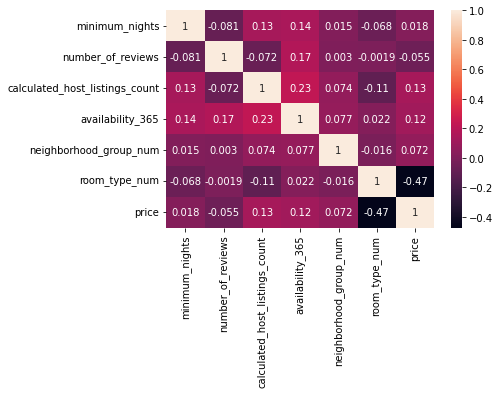

In [127]:
sns.heatmap(pd.concat([X_train1, y_train1], axis=1).corr(), annot=True)

In [122]:
#as y_train1/y_test1 are not normally distributed, perform log transform to make
#it better normally distributed
#y_train2 = np.log(y_train1)
#y_test2 = np.log(y_test1)

In [44]:
#before and after log transformation

#fig = plt.figure(figsize = (8, 6))
#ax = fig.add_subplot(1, 2, 1)
#plt.hist(y_train1)
#ax = fig.add_subplot(1, 2, 2)
#plt.hist(y_train2)

In [153]:
pd.concat([X_train1, y_train1], axis=1).head(6)

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighborhood_group_num,room_type_num,price
0,0.002467,-0.522109,-0.186071,-0.856392,-0.916403,0.906943,50
1,-0.148468,-0.455640,-0.186071,-0.856392,-0.916403,-0.927521,200
2,1.159635,-0.522109,0.782494,1.647550,0.439830,-0.927521,181
3,-0.198779,-0.477796,-0.186071,-0.856392,0.439830,0.906943,40
4,1.159635,-0.522109,6.805759,0.871252,0.439830,-0.927521,211
5,-0.299403,-0.499952,-0.186071,0.133008,0.439830,-0.927521,150


# Train the data with different model and evaluate the prediction

In [45]:
#define a function for mean absoluate error/mse/rmse/mape/r2 square

def opt_print(test, preds):
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(test, preds)))
    print("Mean squared error of the prediction is: {}".format(mse(test, preds)))
    print("Root mean squared error of the prediction is: {}".format(rmse(test, preds)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((test - preds) / test)) * 100))
    print("R2 square value is: {}".format(r2_score(test, preds)))
    return (mean_absolute_error(test, preds),
            mse(test, preds),
            rmse(test, preds),
            np.mean(np.abs((test - preds) / test)) * 100,
            r2_score(test, preds))

In [46]:
# Result summary dataframe, use this to generate dataframe table for different model
df_summary = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], dtype='float')

In [47]:
#Linear regression

In [48]:
#obtain the first linear regression model as the baseline model
lrm = linear_model.LinearRegression()
lrm.fit(X_train1, y_train1)
lrm_pred = lrm.predict(X_test1)
results = opt_print(y_test1, lrm_pred)
df_summary.loc['LR (Baseline)'] = results

Mean absolute error of the prediction is: 59.99282257885336
Mean squared error of the prediction is: 9411.263021175593
Root mean squared error of the prediction is: 97.01166435628033
Mean absolute percentage error of the prediction is: 53.027504635148794
R2 square value is: 0.2556276682603149


In [67]:
lrm.coef_

array([ -5.30976657,  -8.9109578 ,   5.84135252,  14.73495088,
         5.83391447, -53.32922935])

In [49]:
#check the training dataset to see whether there's any overfitting 
lrm_pred_train = lrm.predict(X_train1)
opt_print(y_train1, lrm_pred_train)

Mean absolute error of the prediction is: 60.31717642845649
Mean squared error of the prediction is: 9554.482031549875
Root mean squared error of the prediction is: 97.74703080682234
Mean absolute percentage error of the prediction is: 53.27495906261777
R2 square value is: 0.25189279341340876


(60.31717642845649,
 9554.482031549875,
 97.74703080682234,
 53.27495906261777,
 0.25189279341340876)

In [296]:
#let's try using the log tranformed one
#lrm2 = linear_model.LinearRegression()
#lrm2.fit(X_train1, y_train2)
#lrm_pred2 = lrm2.predict(X_test1)
#results = opt_print(y_test1, np.exp(lrm_pred2))
#df_summary.loc['LR (Baseline_Nor)'] = results

Mean absolute error of the prediction is: 54.53380844342533
Mean squared error of the prediction is: 9718.334524974818
Root mean squared error of the prediction is: 98.58161352389612
Mean absolute percentage error of the prediction is: 40.11013775775367
R2 square value is: 0.23134022344238359


In [ ]:
#With the log transformed target variable, the mape is reduced, but R2 is also reduced. 

In [50]:
lrm.coef_

array([ -5.30976657,  -8.9109578 ,   5.84135252,  14.73495088,
         5.83391447, -53.32922935])

In [99]:
lrm_feature_df = pd.DataFrame(lrm.coef_, index=X_train1.columns, columns=['lrm_coef'])
lrm_feature_df

,lrm_coef
minimum_nights,-5.309767
number_of_reviews,-8.910958
calculated_host_listings_count,5.841353
availability_365,14.734951
neighborhood_group_num,5.833914
room_type_num,-53.329229


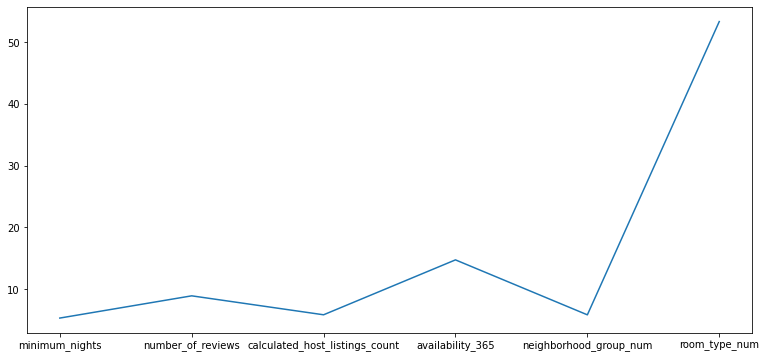

In [100]:
plt.figure(figsize=(13, 6))
plt.plot(abs(lrm_feature_df))

Text(0.5, 1.0, 'price VS. prediction')

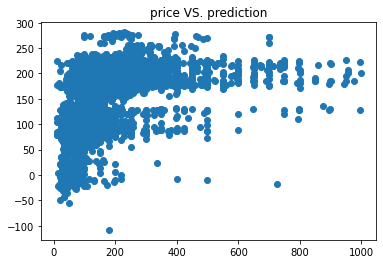

In [109]:
plt.scatter(y_test1, lrm_pred)
plt.title('price VS. prediction')

Text(0.5, 1.0, 'price VS. prediction error')

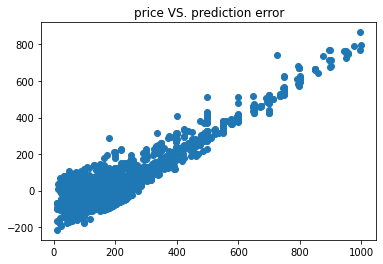

In [107]:
plt.scatter(y_test1, (y_test1 - lrm_pred))
plt.title('price VS. prediction error')

In [270]:
#lrm2.coef_

array([-0.03317189, -0.03480141,  0.03227464,  0.0693018 ,  0.03915783,
       -0.42228581])

In [46]:
#let's try Random forest model

In [205]:
rf = ensemble.RandomForestRegressor(n_estimators=100, max_depth=10, random_state=101)
rf.fit(X_train1, y_train1)
rf_pred = rf.predict(X_test1)
opt_print(y_test1, rf_pred)

Mean absolute error of the prediction is: 51.46566188025839
Mean squared error of the prediction is: 7374.358363661704
Root mean squared error of the prediction is: 85.87408435413856
Mean absolute percentage error of the prediction is: 41.91642774734433
R2 square value is: 0.41673414950874177


In [218]:
#rf2 = ensemble.RandomForestRegressor(n_estimators=100, max_depth=10, random_state=101)
#rf2.fit(X_train1, y_train2)
#rf_pred = rf2.predict(X_test1)
#opt_print(y_test1, np.exp(rf_pred))

Mean absolute error of the prediction is: 48.40088917531073
Mean squared error of the prediction is: 7614.682400387711
Root mean squared error of the prediction is: 87.26214758065326
Mean absolute percentage error of the prediction is: 35.031725096098945
R2 square value is: 0.3977260139175546


In [ ]:
#both looks better than linear regression. Let's do cross-validation and grid search

In [241]:
params = {'n_estimators':[300, 500, 1000], 'max_depth':[10, 20, 15], 'bootstrap':('True', 'False')}
rf = ensemble.RandomForestRegressor(random_state=101)
clf = GridSearchCV(rf, params)
clf.fit(X_train1, y_train1)

GridSearchCV(estimator=RandomForestRegressor(random_state=101),
             param_grid={'bootstrap': ('True', 'False'),
                         'max_depth': [10, 20, 15],
                         'n_estimators': [300, 500, 1000]})

In [246]:
clf.best_params_

{'bootstrap': 'True', 'max_depth': 10, 'n_estimators': 1000}

In [242]:
#params = {'n_estimators':[300, 500, 1000], 'max_depth':[10, 20, 15], 'bootstrap':('True', 'False')}
#rf2 = ensemble.RandomForestRegressor(random_state=101)
#clf2 = GridSearchCV(rf, params)
#clf2.fit(X_train1, y_train2)

GridSearchCV(estimator=RandomForestRegressor(random_state=101),
             param_grid={'bootstrap': ('True', 'False'),
                         'max_depth': [10, 20, 15],
                         'n_estimators': [300, 500, 1000]})

In [248]:
#clf2.best_params_

{'bootstrap': 'True', 'max_depth': 10, 'n_estimators': 1000}

In [ ]:
#from both tests(w/ and w/o standarize the target variable), the best parameters are the same. 

#let's put in those parameters and predict the test dataset

In [51]:
#using non-normalized target 

rf3a=ensemble.RandomForestRegressor(n_estimators=1000, max_depth=10, bootstrap=True, random_state=101)
rf3a.fit(X_train1, y_train1)
rf3a_pred = rf3a.predict(X_test1)
results = opt_print(y_test1, rf3a_pred)
df_summary.loc['RF'] = results

Mean absolute error of the prediction is: 51.45689979308198
Mean squared error of the prediction is: 7362.168274019791
Root mean squared error of the prediction is: 85.8030784647019
Mean absolute percentage error of the prediction is: 41.928820450412644
R2 square value is: 0.4176983097314929


In [52]:
#check if there's any overfitting

rf3a_pred_train = rf3a.predict(X_train1)
opt_print(y_train1, rf3a_pred_train)

Mean absolute error of the prediction is: 48.76074187178508
Mean squared error of the prediction is: 6669.552411478338
Root mean squared error of the prediction is: 81.66732768664797
Mean absolute percentage error of the prediction is: 39.0097164519005
R2 square value is: 0.47778014472600894


(48.76074187178508,
 6669.552411478338,
 81.66732768664797,
 39.0097164519005,
 0.47778014472600894)

In [298]:
#using non-normalized target 

#rf3b=ensemble.RandomForestRegressor(n_estimators=1000, max_depth=10, bootstrap=True, random_state = 101)
#rf3b.fit(X_train1, y_train2)
#rf3b_pred = rf3b.predict(X_test1)
#results = opt_print(y_test1, np.exp(rf3b_pred))
#df_summary.loc['RF_Nor'] = results

Mean absolute error of the prediction is: 48.41284877561004
Mean squared error of the prediction is: 7603.281729131641
Root mean squared error of the prediction is: 87.19679884681342
Mean absolute percentage error of the prediction is: 35.0666300289883
R2 square value is: 0.3986277360591187


In [273]:
#check if there's any overfitting

#rf3b_pred_train = rf3b.predict(X_train1)
#opt_print(y_train1, np.exp(rf3b_pred_train))

Mean absolute error of the prediction is: 46.80684326875655
Mean squared error of the prediction is: 7430.28322287995
Root mean squared error of the prediction is: 86.19909061515644
Mean absolute percentage error of the prediction is: 32.793277874204335
R2 square value is: 0.41821561779479943


In [53]:
rf3a.feature_importances_

array([0.09607082, 0.09767472, 0.06601996, 0.1360888 , 0.11392808,
       0.49021762])

In [263]:
#rf3b.feature_importances_

array([0.04531676, 0.04681832, 0.03798108, 0.06360609, 0.12221785,
       0.68405989])

In [48]:
#KNN model

In [54]:
knn= neighbors.KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train1, y_train1)
knn_pred = knn.predict(X_test1)
results = opt_print(y_test1, knn_pred)
df_summary.loc['KNN'] = results

Mean absolute error of the prediction is: 53.45530894296073
Mean squared error of the prediction is: 7800.898395705645
Root mean squared error of the prediction is: 88.32269468095754
Mean absolute percentage error of the prediction is: 43.190074188450225
R2 square value is: 0.38299748764747243


In [51]:
#SVM model

In [260]:
#do grid search and cross validation for SVM model

params2 = {'C':[0.1, 0.5, 1.0], 
          'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
svr = SVR()
clf_svr = GridSearchCV(svr, params2)
clf_svr.fit(X_train1, y_train1)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 1.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [266]:
clf_svr.best_params_

{'C': 1.0, 'kernel': 'rbf'}

In [357]:
svr1 = SVR(C=1, kernel='rbf')
svr1.fit(X_train1, y_train1)
svr1_pred = svr1.predict(X_test1)
results = opt_print(y_test1, svr1_pred)
df_summary.loc['SVR'] = results

Mean absolute error of the prediction is: 50.510423147547
Mean squared error of the prediction is: 9023.935365770965
Root mean squared error of the prediction is: 94.99439649669324
Mean absolute percentage error of the prediction is: 34.83252109941273
R2 square value is: 0.28626287517697313


In [342]:
# normalized target is slightly better in R2 score

#svr2 = SVR(C=1, kernel='rbf')
#svr2.fit(X_train1, y_train2)
#svr2_pred = svr2.predict(X_test1)
#results = opt_print(y_test1, np.exp(svr2_pred))
#df_summary.loc['SVR_Nor'] = results

Mean absolute error of the prediction is: 49.04904844243599
Mean squared error of the prediction is: 8351.447840363231
Root mean squared error of the prediction is: 91.38625629909144
Mean absolute percentage error of the prediction is: 34.03134823785365
R2 square value is: 0.3394524530505576


In [53]:
#boost model

In [285]:
params3 = {'learning_rate':[0.01, 0.05, 0.1], 'n_estimators':[500, 1000, 2000], 'max_depth':[5, 10, 20]}
bregr = ensemble.GradientBoostingRegressor(random_state=101)
clf_bregr = GridSearchCV(bregr, params3) 
clf_bregr.fit(X_train1, y_train1)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=101),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [500, 1000, 2000]})

In [290]:
clf_bregr.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 2000}

In [58]:
clf = ensemble.GradientBoostingRegressor(loss='squared_error', learning_rate=0.01, n_estimators=2000, max_depth=5)
clf.fit(X_train1, y_train1)
clf_pred = clf.predict(X_test1)
results = opt_print(y_test1, clf_pred)
df_summary.loc['Boost_model'] = results

Mean absolute error of the prediction is: 51.2965745668656
Mean squared error of the prediction is: 7264.6161406720485
Root mean squared error of the prediction is: 85.23271754832207
Mean absolute percentage error of the prediction is: 41.96801851652657
R2 square value is: 0.42541407634038


In [ ]:
#now we have tested different models and tuning the parameters, let's evaluate it 

In [59]:
df_summary

,MAE,MSE,RMSE,MAPE,R2
LR (Baseline),59.992823,9411.263021,97.011664,53.027505,0.255628
RF,51.456900,7362.168274,85.803078,41.928820,0.417698
KNN,53.455309,7800.898396,88.322695,43.190074,0.382997
Boost_model,51.296575,7264.616141,85.232718,41.968019,0.425414


Text(0.5, 1.0, 'Model VS. R2')

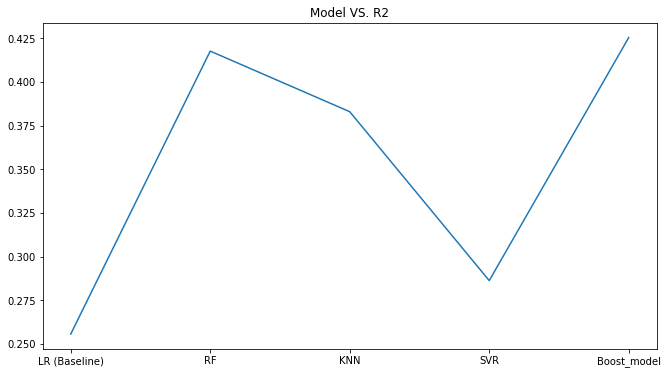

In [360]:
fig = plt.figure(figsize=(11, 6))
plt.plot(df_summary.R2)
plt.title('Model VS. R2')

Text(0.5, 1.0, 'Model VS. MAPE')

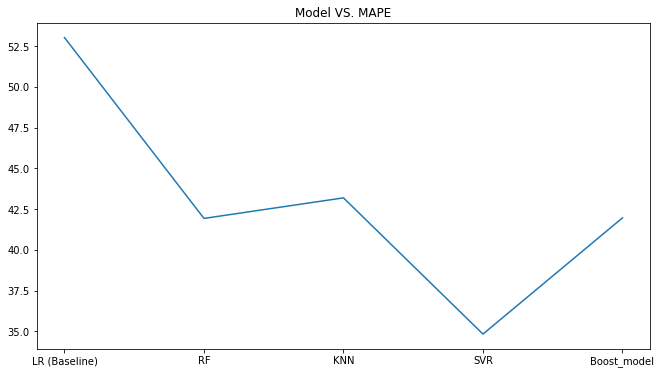

In [361]:
fig = plt.figure(figsize=(11, 6))
plt.plot(df_summary.MAPE)
plt.title('Model VS. MAPE')

Text(0.5, 1.0, 'Model VS. RMSE')

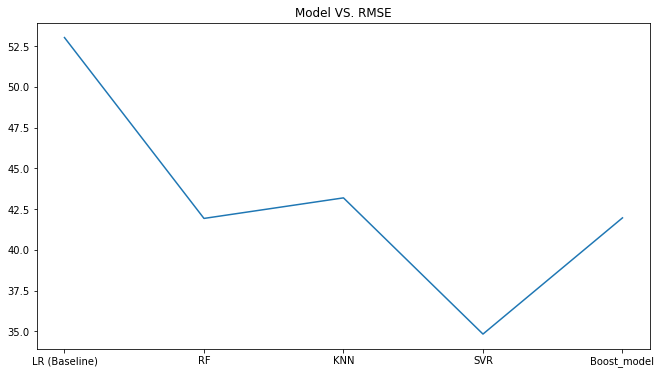

In [362]:
fig = plt.figure(figsize=(11, 6))
plt.plot(df_summary.MAPE)
plt.title('Model VS. RMSE')

Text(0.5, 1.0, 'Model VS. MSE')

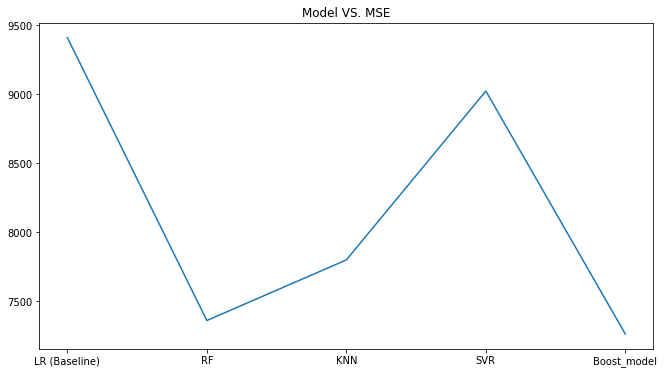

In [363]:
fig = plt.figure(figsize=(11, 6))
plt.plot(df_summary.MSE)
plt.title('Model VS. MSE')

Text(0.5, 1.0, 'Model VS. MAE')

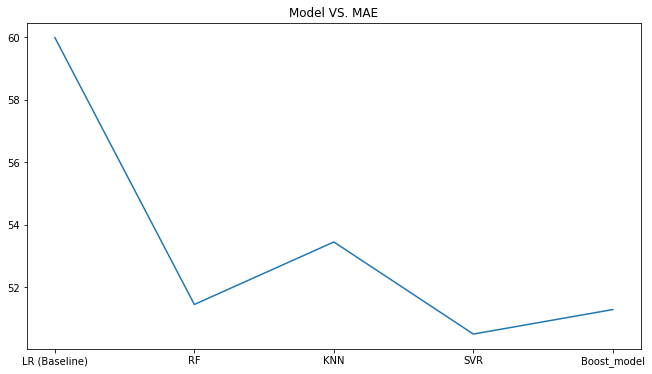

In [364]:
fig = plt.figure(figsize=(11, 6))
plt.plot(df_summary.MAE)
plt.title('Model VS. MAE')

In [365]:
#overall, the Random forest without standalized target and boost model are comparable, some Random forest is better, some boost model
#is better. As boost model has higher R2, we will pick the boost model

In [66]:
#Let's plot the feature importance
X_train1.columns
clf_feature_df = pd.DataFrame(clf.feature_importances_, index=X_train1.columns, columns=['feature importance'])
clf_feature_df

,feature importance
minimum_nights,0.077438
number_of_reviews,0.069161
calculated_host_listings_count,0.080385
availability_365,0.115479
neighborhood_group_num,0.123047
room_type_num,0.534490


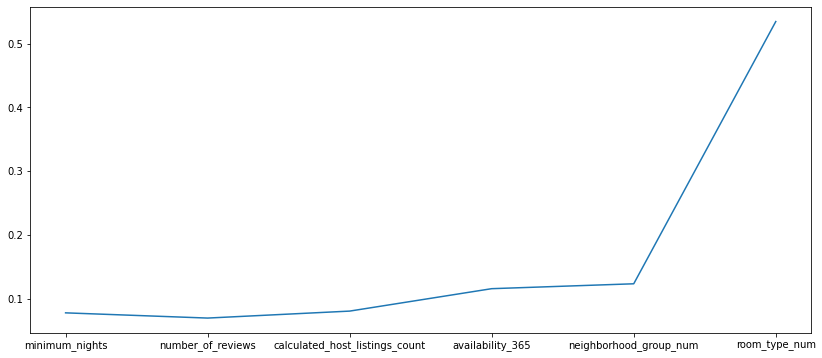

In [367]:
plt.figure(figsize = (14, 6))
plt.plot(clf_feature_df)

In [ ]:
# To further improve the prediction
#the overall prediction (e.g. R2, RMSE, MAPE) is still not that good. To improve that, probably can further collect some data that
#has higher correlation with the target varable, for example, among  the reviews, how many are above 3 stars, and how many are below 
#3 stars

In [ ]:
#neural network model

In [303]:
regr = MLPRegressor(hidden_layer_sizes=(18, 72, 36, 18), alpha=0.00001)
regr.fit(X_train1, y_train1)
regr_pred = regr.predict(X_test1)
results = opt_print(y_test1, regr_pred)

Mean absolute error of the prediction is: 53.352805802393675
Mean squared error of the prediction is: 7656.198055314715
Root mean squared error of the prediction is: 87.49970317272347
Mean absolute percentage error of the prediction is: 44.201752177858985
R2 square value is: 0.3944423839953878


C:\Users\zhang\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
enc1.categories_[0]